<a href="https://colab.research.google.com/github/Abdulwadud4/ACCESS-6.0-Data-Science-track/blob/main/week_three_session_five_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
res = pd.read_csv("/content/retail_sales_dataset.csv")

In [3]:
res.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [4]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
res.tail(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
990,991,2023-12-26,CUST991,Female,34,Clothing,2,50,100
991,992,2023-08-21,CUST992,Female,57,Electronics,2,30,60
992,993,2023-02-06,CUST993,Female,48,Electronics,3,50,150
993,994,2023-12-18,CUST994,Female,51,Beauty,2,500,1000
994,995,2023-04-30,CUST995,Female,41,Clothing,1,30,30
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [6]:
res.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/tmp/ipython-input-624979974.py:22: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


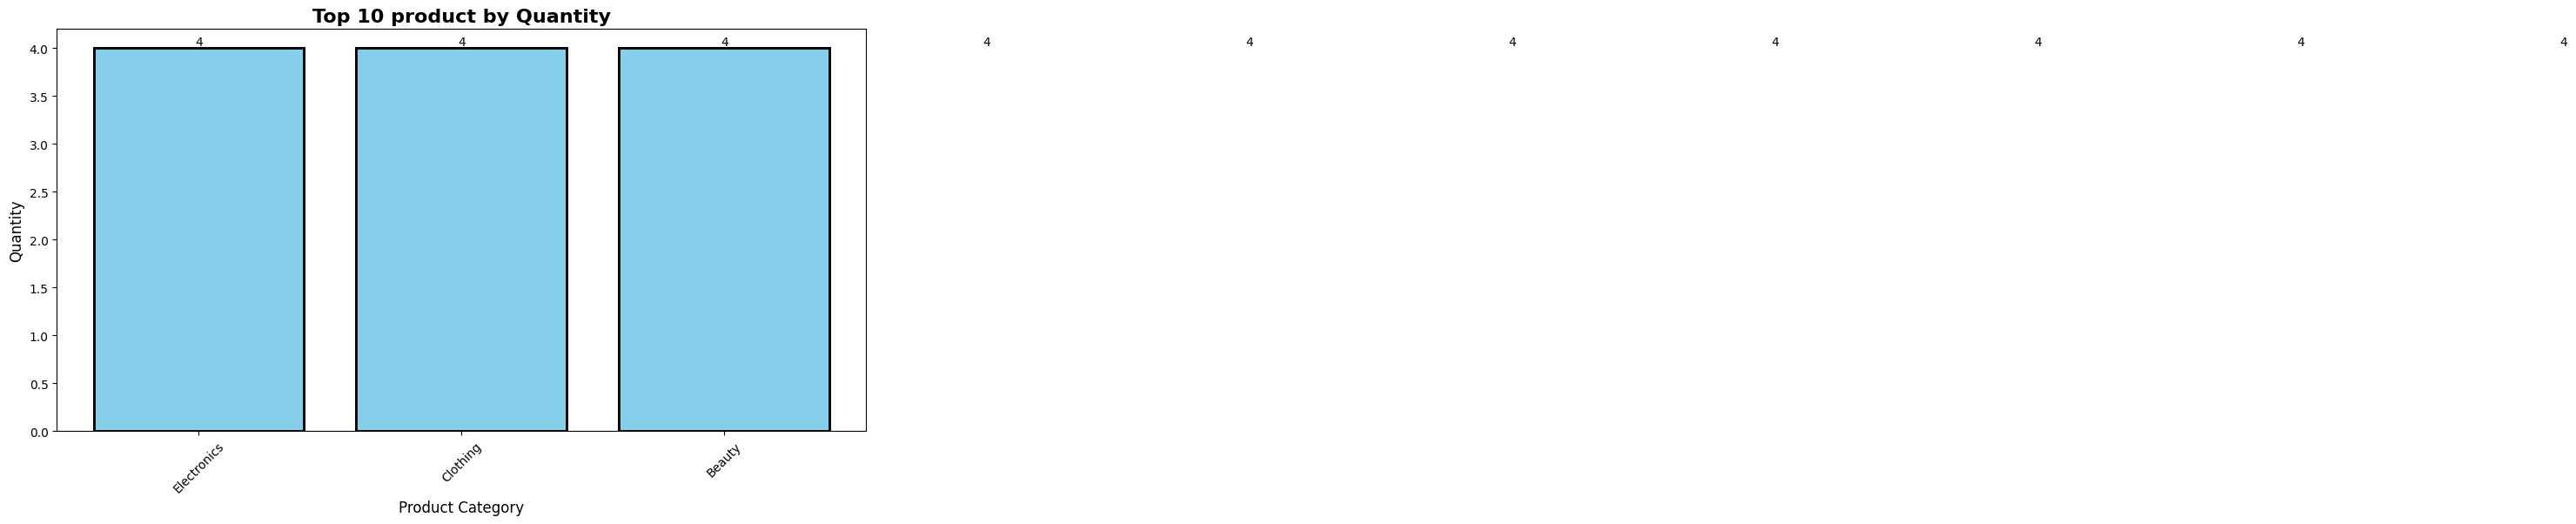

In [8]:
#Get the top 10 product by quantity demanded
top_10 = res.sort_values('Quantity', ascending = False).head(10)

#Method 1 - Matplotlib
plt.figure(figsize=(12, 6)) #Set the chart size. Width = 12 inches and height = 6 inches

plt.bar( x= top_10['Product Category'],
         height= top_10['Quantity'],
         color = 'skyblue',
         edgecolor = 'black',
         linewidth = 2
        )
plt.title('Top 10 product by Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45)

#Add value labels on top of bars
for Quantity, value in enumerate(top_10['Quantity']):
    plt.text(x=Quantity, y=value, s=f'{value}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


/tmp/ipython-input-3368623323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =top_10,


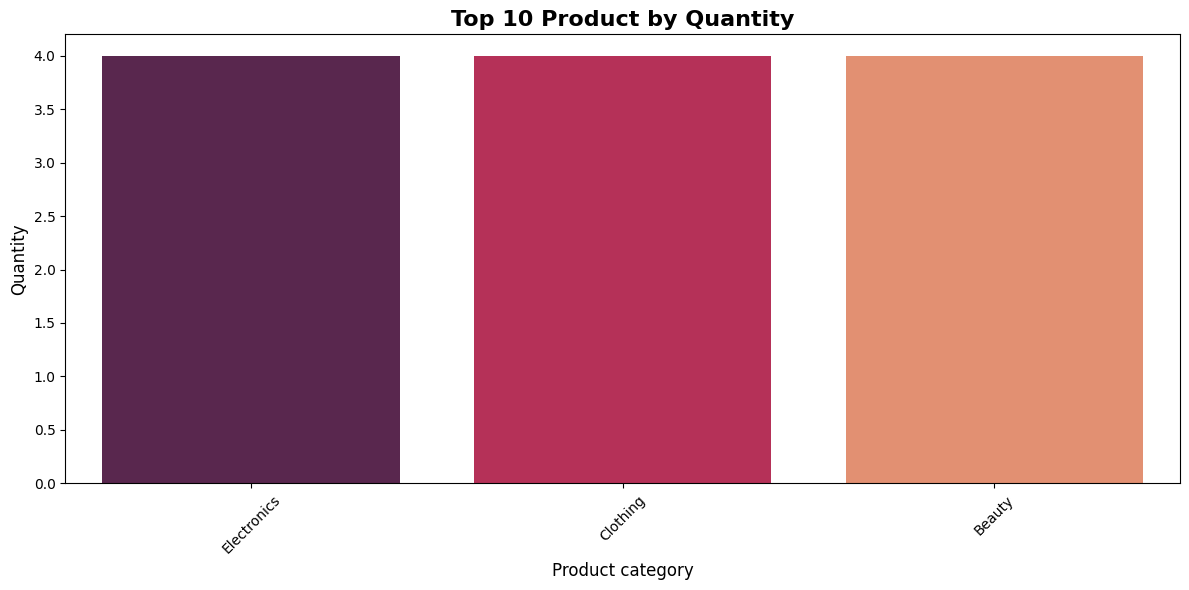

In [9]:
#Seaborn
plt.figure(figsize =(12,6))
sns.barplot(data =top_10,
            x ='Product Category',
            y ='Quantity',
            palette = 'rocket'
            )
plt.title('Top 10 Product by Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Product category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
res['Product Category'].nunique()

3

In [11]:
group = res.groupby("Product Category")["Quantity"]. sum().reset_index()

/tmp/ipython-input-3241136457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =top_10,


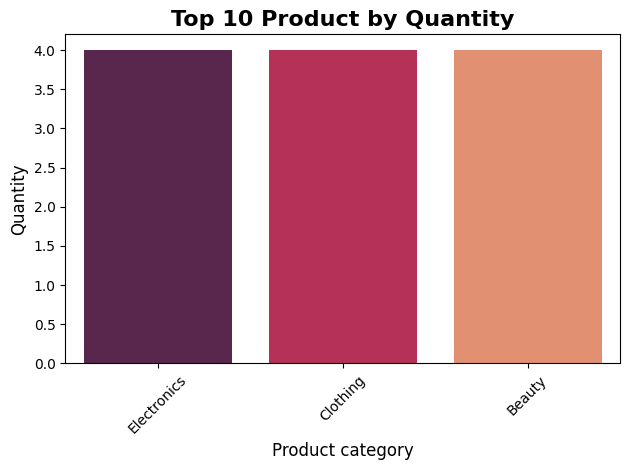

In [12]:
Top_10= group.sort_values("Quantity", ascending = False).head()
sns.barplot(data =top_10,
            x ='Product Category',
            y ='Quantity',
            palette = 'rocket'
            )
plt.title('Top 10 Product by Quantity', fontsize=16, fontweight='bold')
plt.xlabel('Product category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot with trend line
sns.regplot(data=res,
            x='Quantity',
            y='Price_per_Unit',
            scatter_kws={'alpha':0.6, 's':100, 'edgecolor':'black'},
            line_kws={'color':'red', 'linewidth':2}
)

plt.title('Quantity vs Price per unit with Trend Line',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Price_per_Unit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Quantity'].corr(df['Price_per_Unit'])
print(f"correlation coefficient: {correlation}")

KeyError: 'Price_per_Unit'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))

# Histogram with smooth curve overlay
sns.histplot(data=res,
             x='Price_per_Unit',
             bins=20,
             kde=True,  # Add smooth density curve
             color='skyblue',
             edgecolor='black')

plt.title('Price per Unit Distribution with Density Curve',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Price_per_Unit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()